# フーリエ変換による画像再構成でも

In [1]:
import numpy as np
import scipy as sp
from scipy.fft import fft2, ifft2
from matplotlib import cm
import matplotlib.pylab as plt
from PIL import Image


In [3]:
def scnline(n):
    '''n レベルのスキャンラインの生成'''
    ret = []
    for i in range(n + 1):
        ret.append((i, n - i))
    for i in range(n + 1):
        ret.append((-i, n - i))

    return ret


def scnseq(n):
    '''n レベルの までのスキャン系列'''
    ret = []
    for i in range(n + 1):
        ret += scnline(i)
    return ret


def decompImgCoord(img, blksz=16):
    startPnt = []
    nblks = 0
    Nh = img.shape[0]
    Nw = img.shape[1]
    for i in range(Nh // blksz):
        for j in range(Nw // blksz):
            startPnt.append((i * blksz, j * blksz))
            nblks += 1
    return startPnt


def blkiFFT(blkFFTimg, startPnts, blksz):
    blkifftimg = np.zeros(blkFFTimg.shape, dtype=complex)
    for b in startPnts:
        py, px = b[0], b[1]
        blkifftimg[py : py + blksz, px : px + blksz] = np.fft.ifft2(
            blkFFTimg[py : py + blksz, px : px + blksz]
        )
    return blkifftimg


def blkFFT(img, startPnts, blksz):
    blkfftimg = np.zeros(img.shape, dtype=complex)
    for b in startPnts:
        py, px = b[0], b[1]
        blkfftimg[py:py+blksz, px:px+blksz] = fft2(img[py:py+blksz, px:px+blksz])
    return blkfftimg


def blkFilter(blkFFTimg, flt, startPnts, blksz):
    filterimg = np.zeros(blkFFTimg.shape, dtype=complex)
    for b in startPnts:
        py, px = b[0], b[1]
        filterimg[py : py + blksz, px : px + blksz] = (blkFFTimg[py : py + blksz, px : px + blksz] * flt)
    return filterimg



Total CoverRate 0.21875


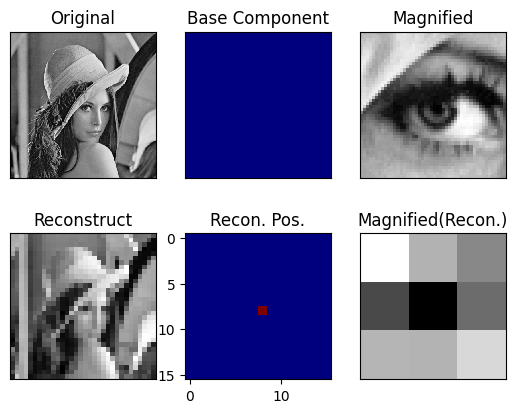

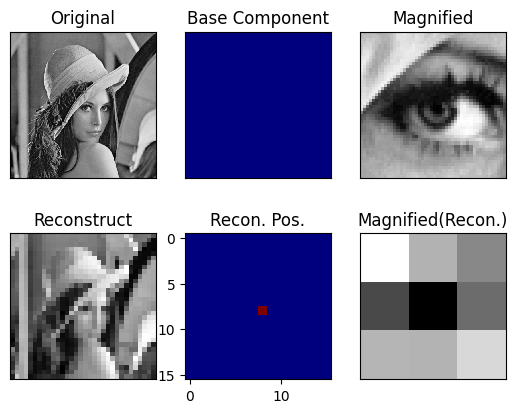

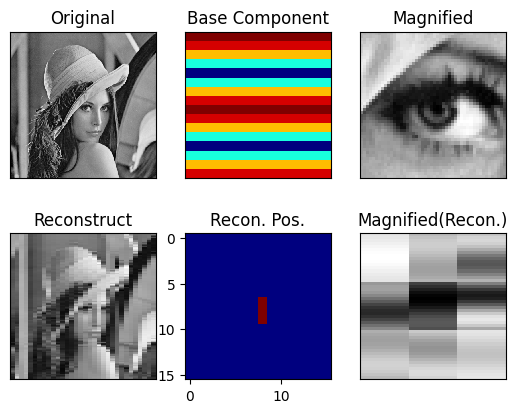

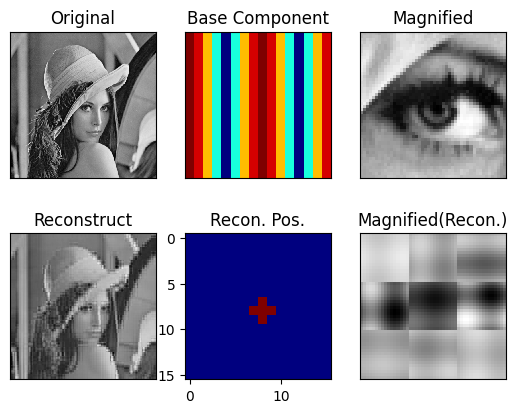

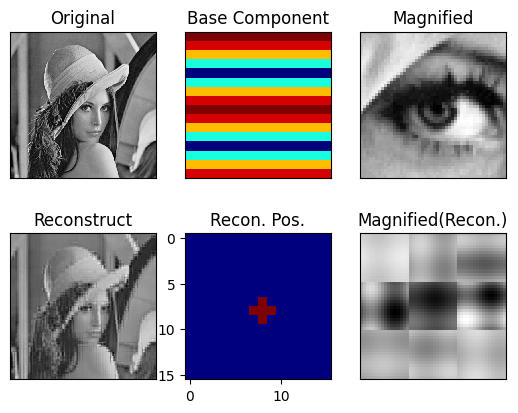

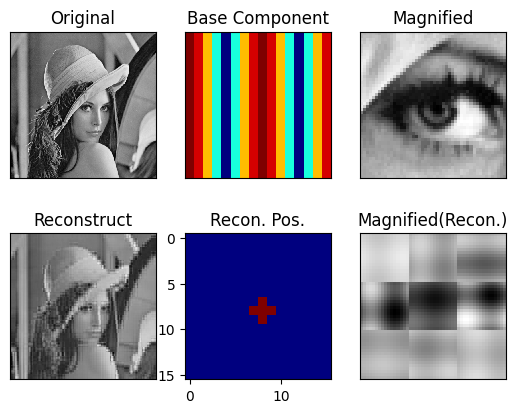

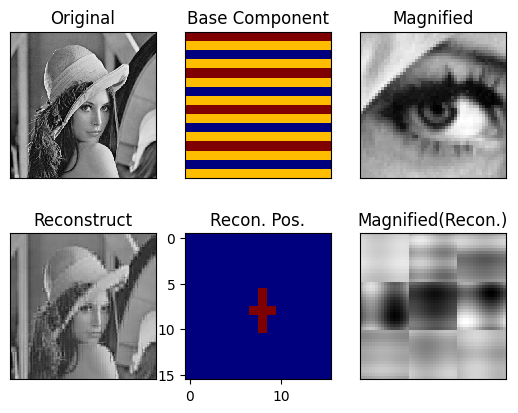

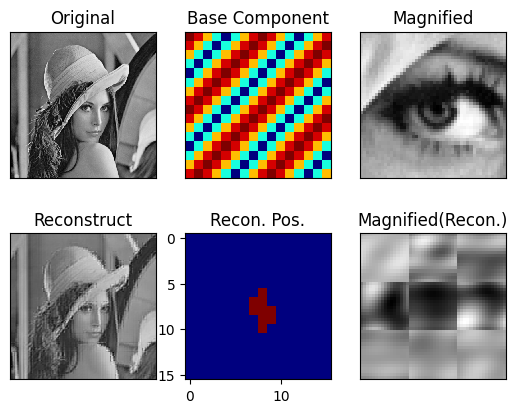

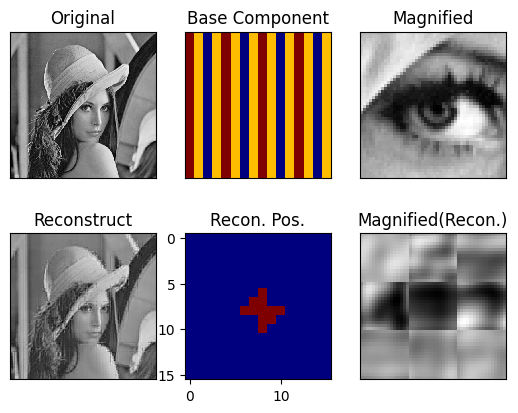

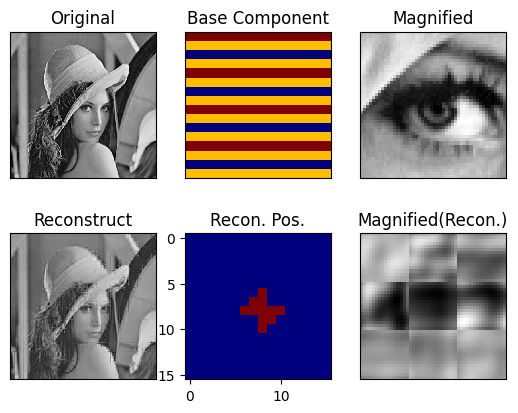

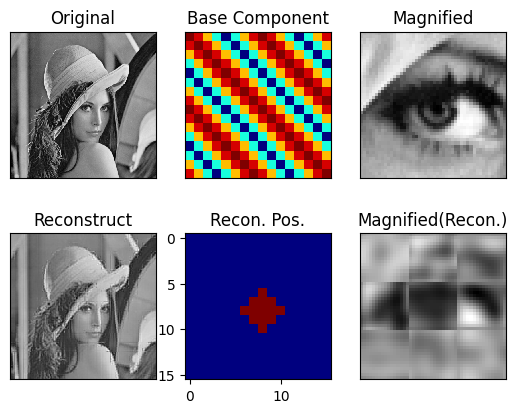

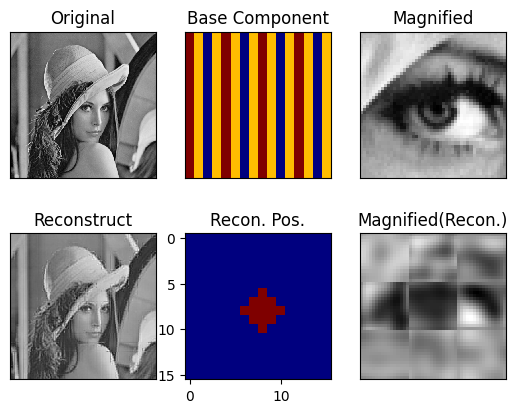

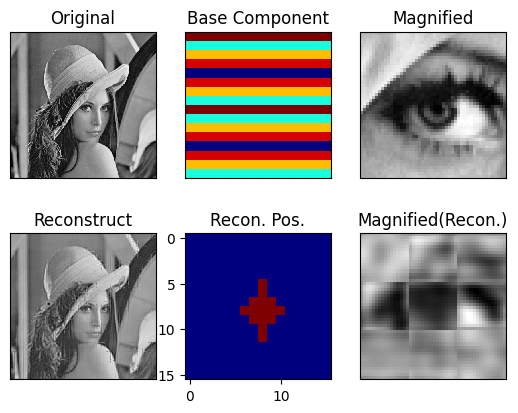

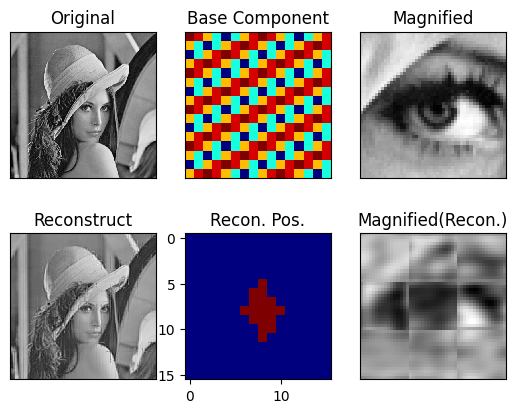

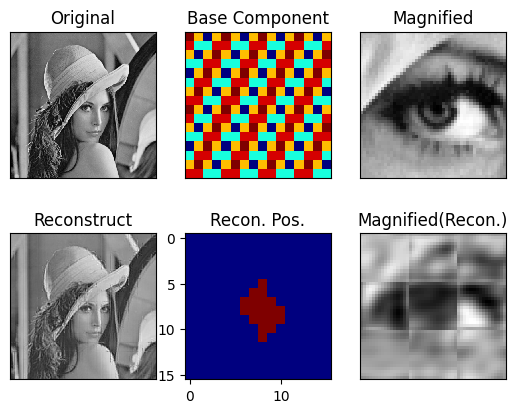

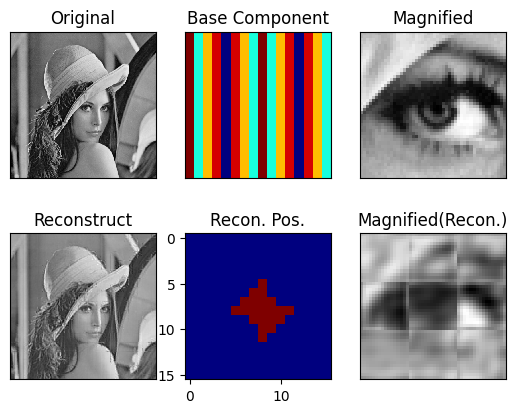

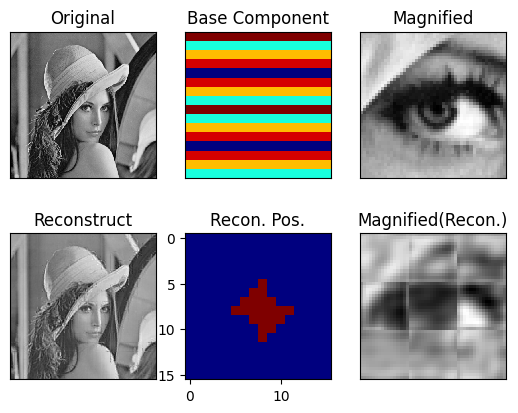

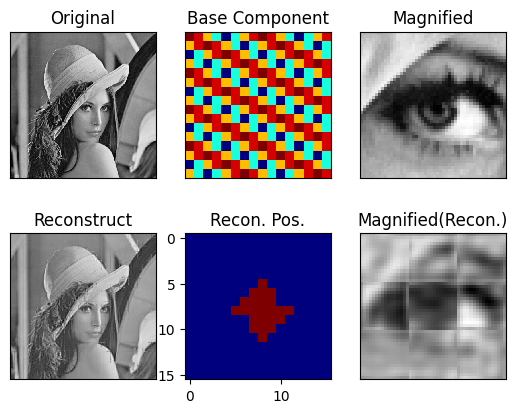

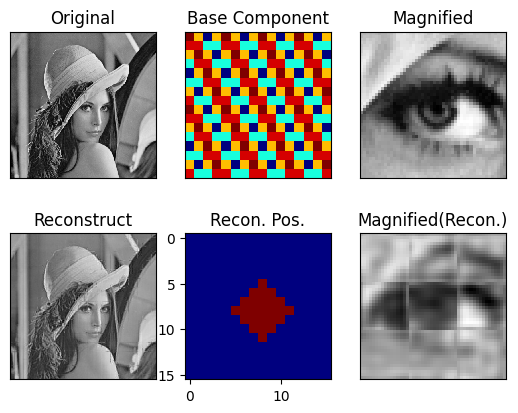

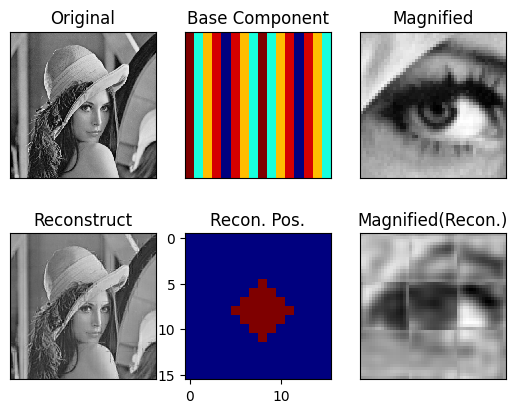

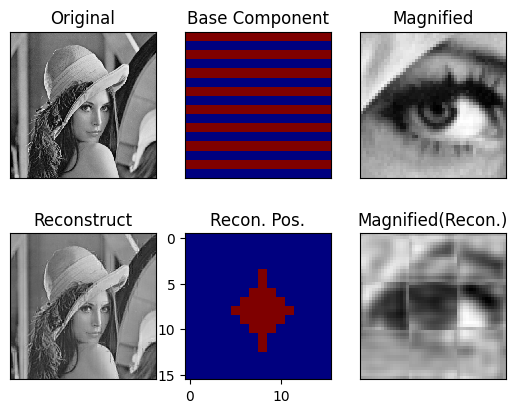

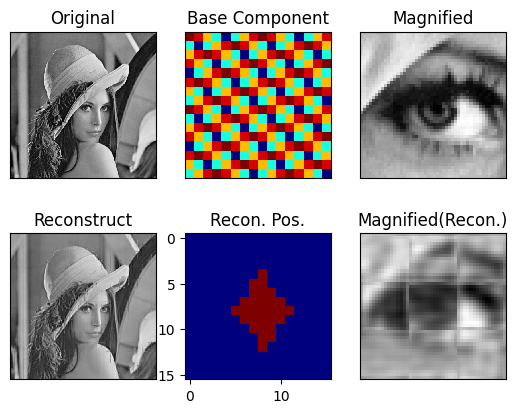

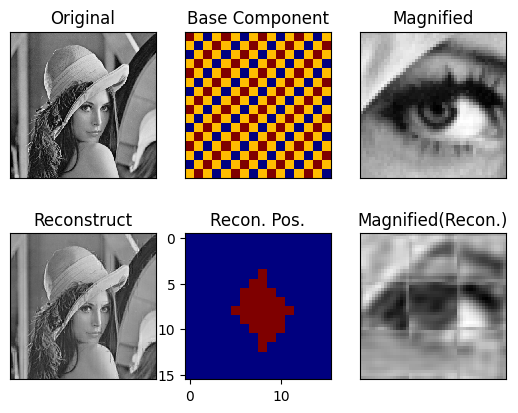

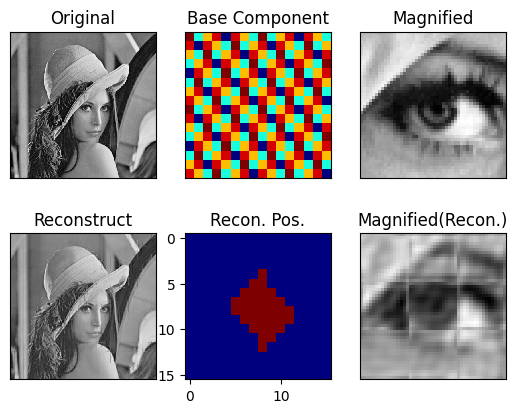

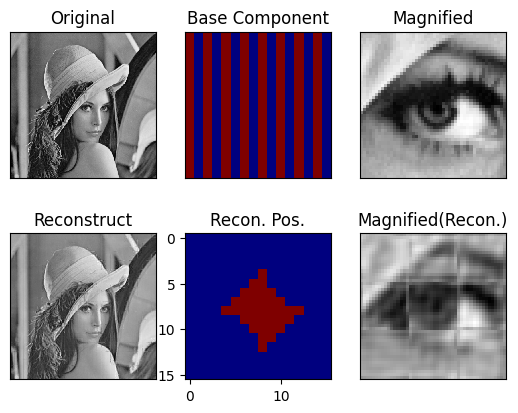

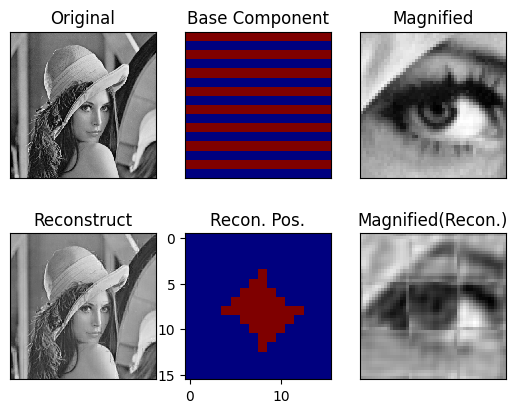

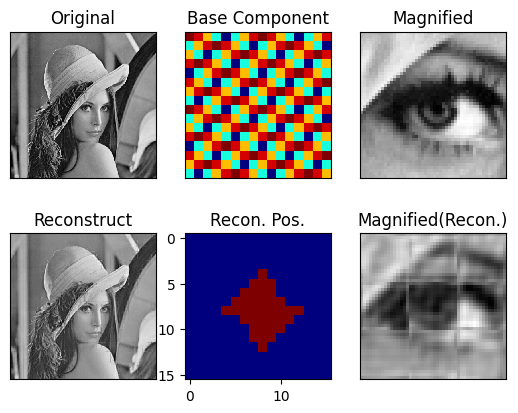

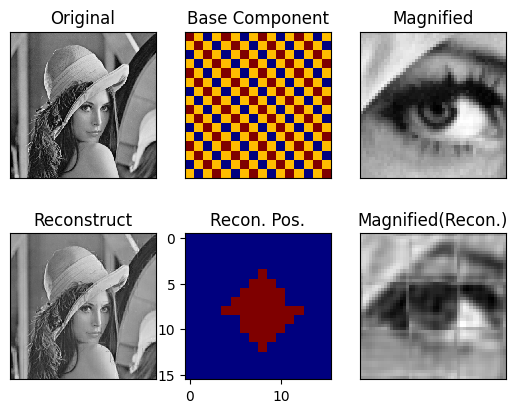

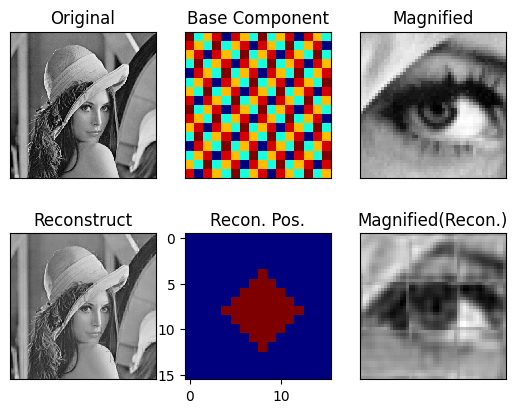

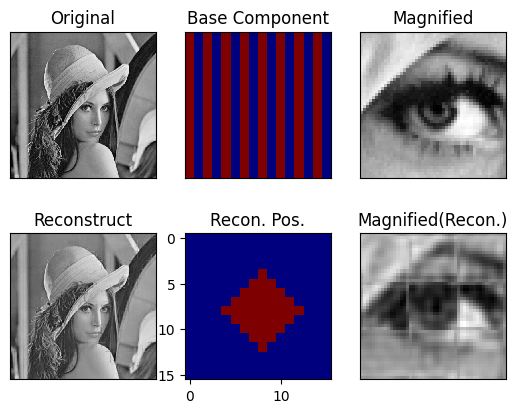

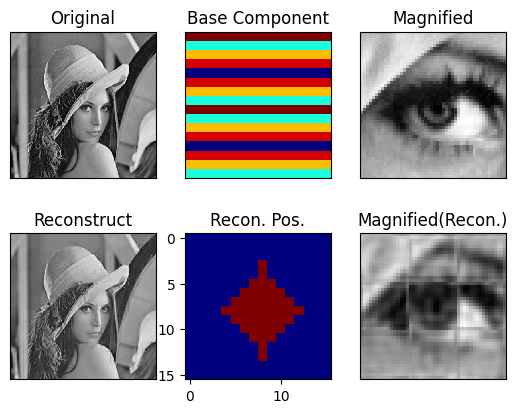

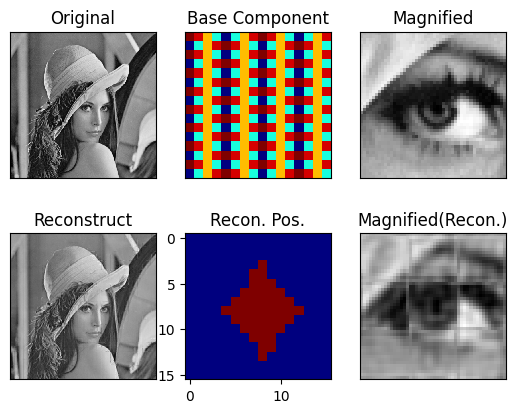

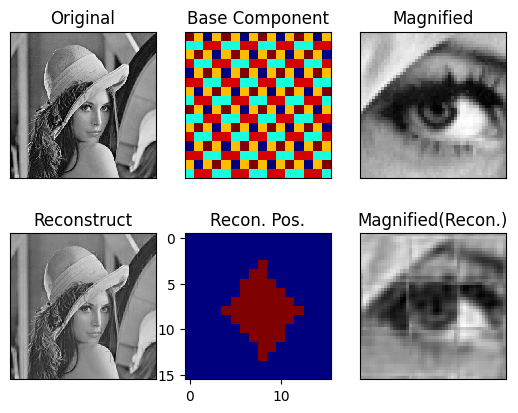

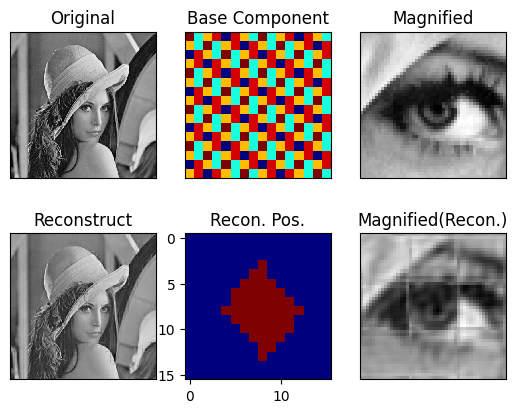

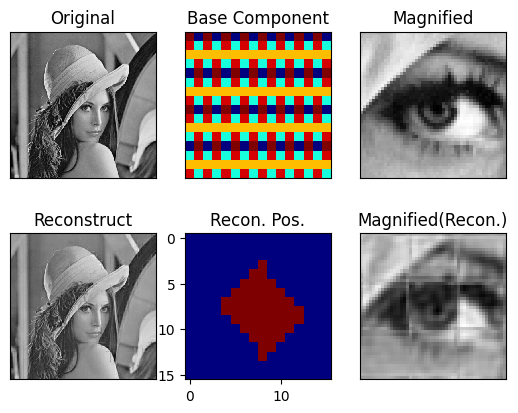

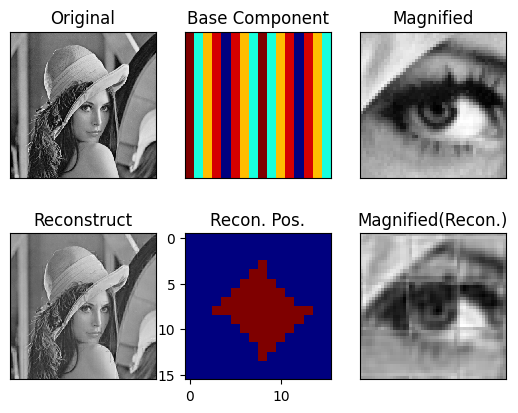

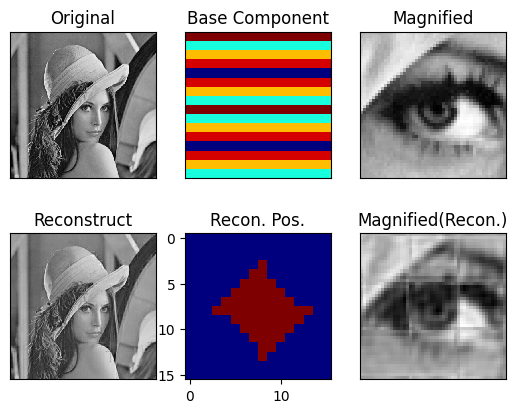

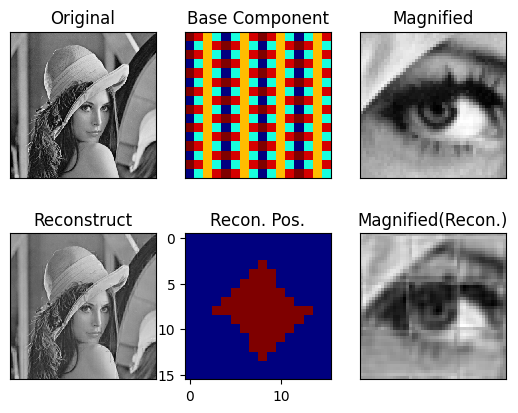

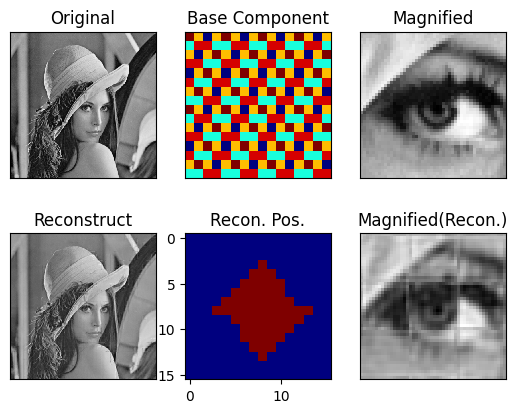

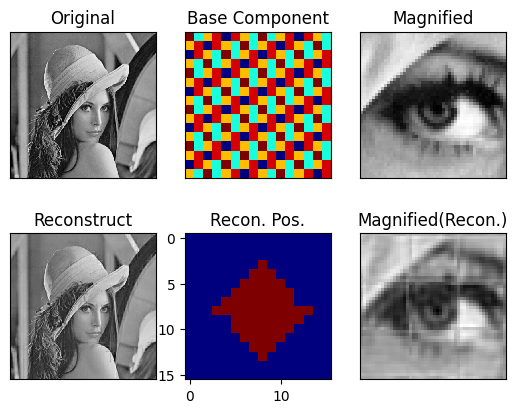

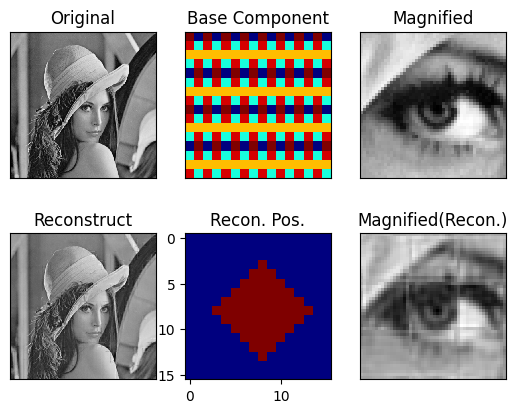

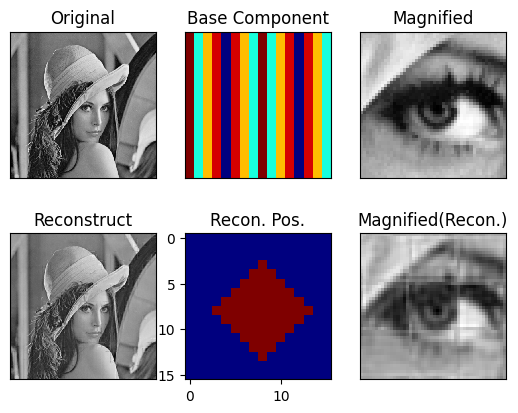

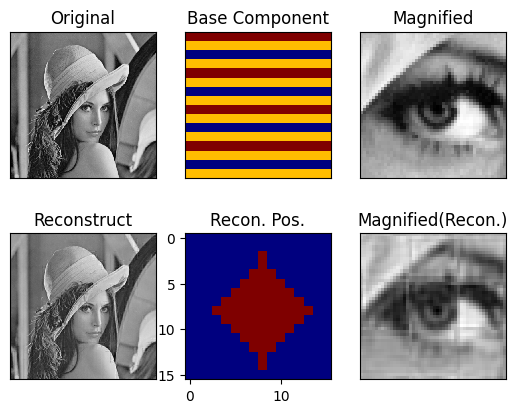

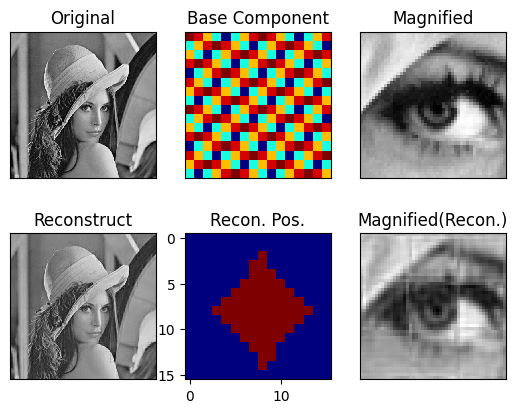

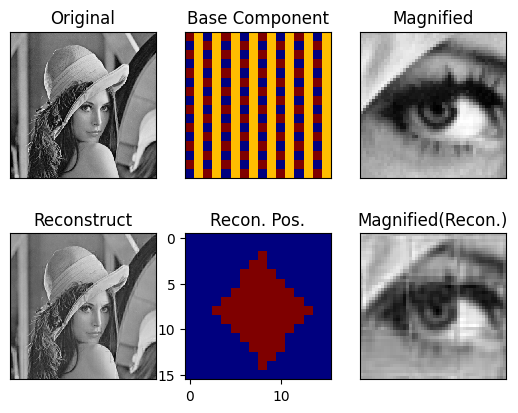

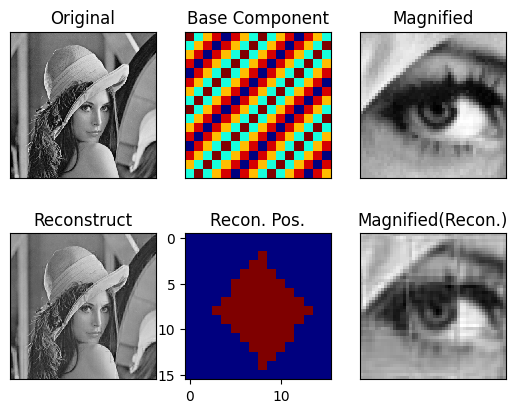

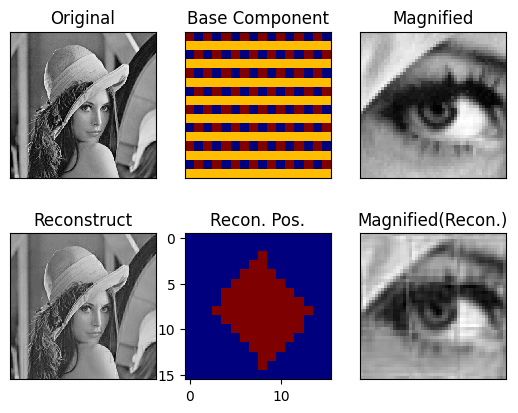

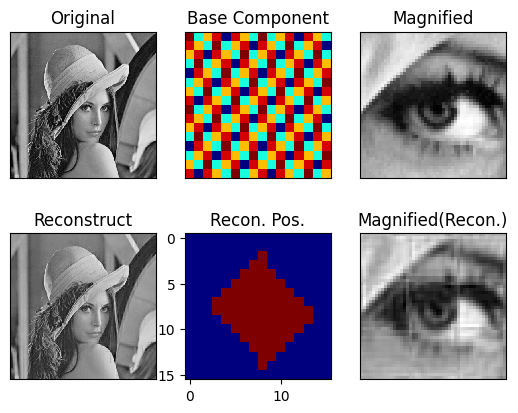

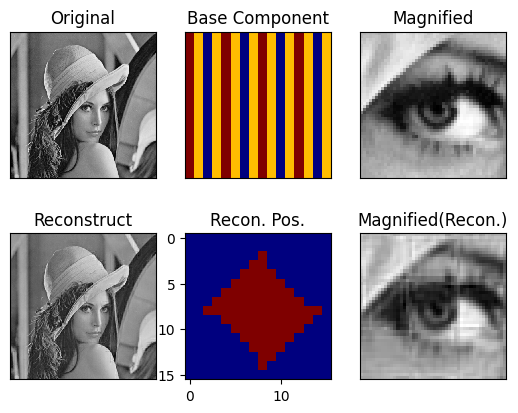

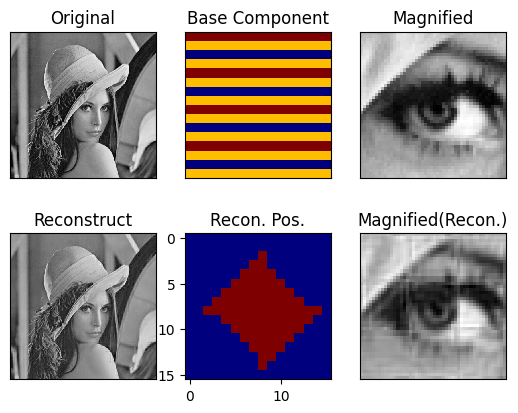

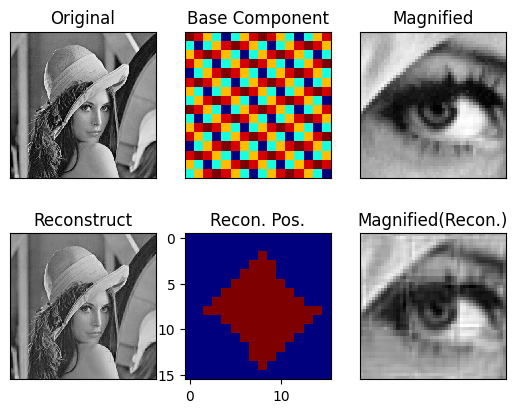

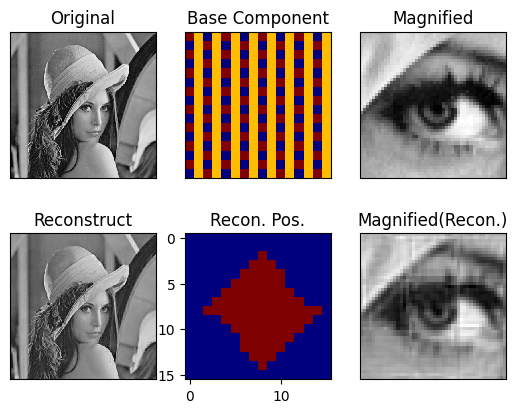

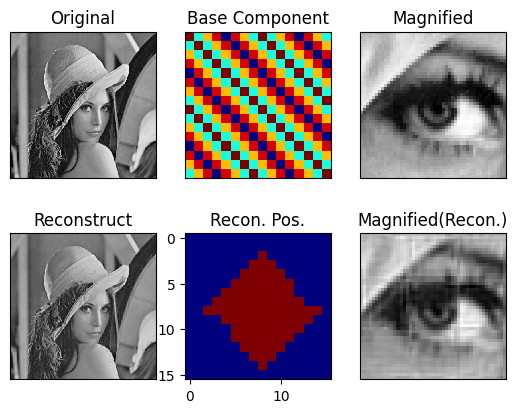

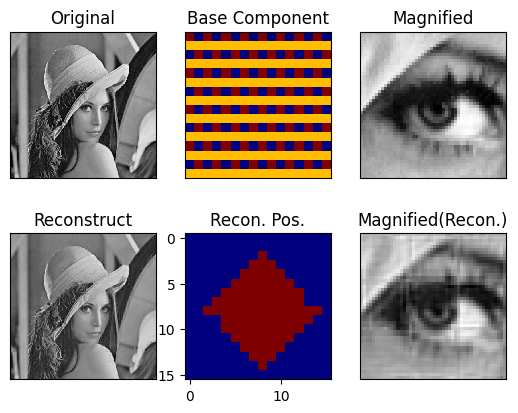

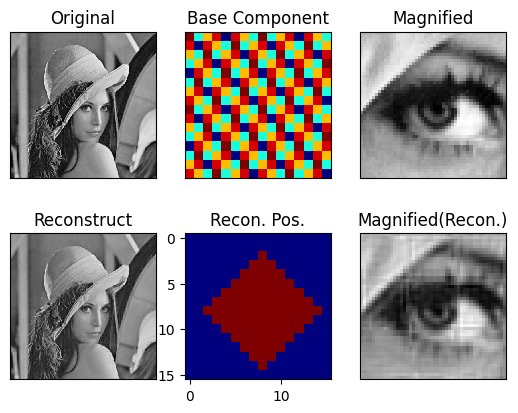

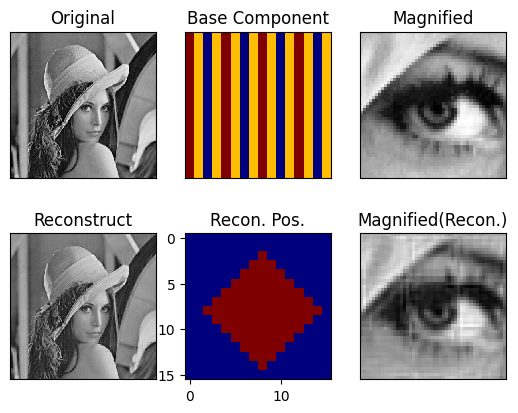

In [4]:

img = Image.open("../test_images/lena.png")
img_ary = np.asarray(img)

# blksz = 32
blksz = 16
# blksz = 8
blkinput = []
nblks = 0

blkPnts = decompImgCoord(img_ary, blksz=blksz)
blkFFTimg = blkFFT(img_ary, blkPnts, blksz)

flt = np.zeros((blksz, blksz))
RecRange = 6
RecSeq = scnseq(RecRange)

print("Total CoverRate", len(RecSeq) / (blksz**2))

for p in RecSeq:
    plt.clf()
    plt.subplot(2, 3, 1)
    plt.imshow(img, interpolation="nearest")
    plt.title("Original")
    plt.gray()
    plt.xticks(())
    plt.yticks(())

    ppx, ppy = p[0], p[1]

    cur = np.zeros((blksz, blksz))
    cur[ppy, ppx] = 1
    cur[-ppy, -ppx] = 1

    plt.subplot(2, 3, 2)
    baseimg = np.abs(ifft2(cur))
    plt.imshow(baseimg, cmap='jet', interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    plt.title("Base Component")

    #    nblk = 4
    nblk = 3
    #    xoff, yoff = 7, 7
    xoff, yoff = 15, 15
    plt.subplot(2, 3, 3)
    rrr = (yoff * blksz, (yoff + nblk) * blksz, xoff * blksz, (xoff + nblk) * blksz)
    plt.imshow(img_ary[rrr[0] : rrr[1], rrr[2] : rrr[3]], cmap=cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    plt.title("Magnified")

    plt.subplot(2, 3, 4)
    flt[ppy, ppx] = 1
    flt[-ppy, -ppx] = 1

    fblkFFTimg = blkFilter(blkFFTimg, flt, blkPnts, blksz)
    recimg = blkiFFT(fblkFFTimg, blkPnts, blksz).real

    plt.imshow(recimg, interpolation="nearest")
    plt.gray()
    plt.xticks(())
    plt.yticks(())
    plt.title("Reconstruct")

    plt.subplot(2, 3, 5)
    plt.imshow(np.fft.fftshift(flt), interpolation="nearest", cmap='jet')
    plt.title("Recon. Pos.")


    plt.subplot(2, 3, 6)
    plt.imshow(recimg[rrr[0] : rrr[1], rrr[2] : rrr[3]], cmap=cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    plt.title("Magnified(Recon.)")

    plt.pause(0.5)


In [9]:
img

Help on PngImageFile in module PIL.PngImagePlugin object:

class PngImageFile(PIL.ImageFile.ImageFile)
 |  PngImageFile(fp=None, filename=None)
 |  
 |  Method resolution order:
 |      PngImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  getexif(self)
 |      Gets EXIF data from the image.
 |      
 |      :returns: an :py:class:`~PIL.Image.Exif` object.
 |  
 |  getxmp(self)
 |      Returns a dictionary containing the XMP tags.
 |      Requires defusedxml to be installed.
 |      
 |      :returns: XMP tags in a dictionary.
 |  
 |  load_end(self)
 |      internal: finished reading image data
 |  
 |  load_prepare(self)
 |      internal: prepare to read PNG file
 |  
 |  load_read(self, read_bytes)
 |      internal: read more image data
 |  
 |  seek(self, frame)
 |      Seeks to the given frame in this sequence file. If you seek
 |      beyond the end of the sequence, the method raises an
 |      ``EOFEr